In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import powerlaw
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap
import colorsys
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import random

In [25]:
#set number of nodes and number of links created by each node
n=1000
m=2
#set prescaler which helps the network with creating connections
eta=100

#create graph with no links
nodes=np.arange(0,n)
G=nx.Graph()
G.add_nodes_from(nodes)

#assign the activ_status to each node
activity_distribution = powerlaw.Power_Law(
    xmin=0.001,xmax=1.0, parameters=[2.8], discrete=False
)
activity= eta*activity_distribution.generate_random(n)

activity_status=dict(zip(np.arange(0,n,1),([0]*n)))
nx.set_node_attributes(G, values=activity_status, name='activity_status')

#set initial infected and healthy status
q=0.3
node_status=dict(zip(np.arange(0,n,1),(np.random.choice([0,1],n,p=[1-q,q]))))
nx.set_node_attributes(G, values=node_status, name='state')

#list of views on network
graph_list=[]
graph_list+=[G]

for ii in range(300):
    G=nx.Graph()
    G.add_nodes_from(nodes)
    nx.set_node_attributes(G, values=node_status, name='state')
    nx.set_node_attributes(G, values=activity_status, name='activity_status')

    active_nodes=[]

    for node_id,aa in zip(nodes,activity):
        # print(node_id,aa)
        if np.random.random()<=min(1,aa):
            active_nodes+=[node_id]
    active_dict={}
    for a_node_id in active_nodes:
        active_dict[a_node_id]=1
        a=[(a_node_id,random.randint(0,len(nodes)-1)) for ii in range(m)]
        # print(a)
        G.add_edges_from(a)
    nx.set_node_attributes(G, values=active_dict, name='activity_status')
    graph_list+=[G]

<module 'matplotlib.pyplot' from 'E:\\programy\\pyton\\lib\\site-packages\\matplotlib\\pyplot.py'>

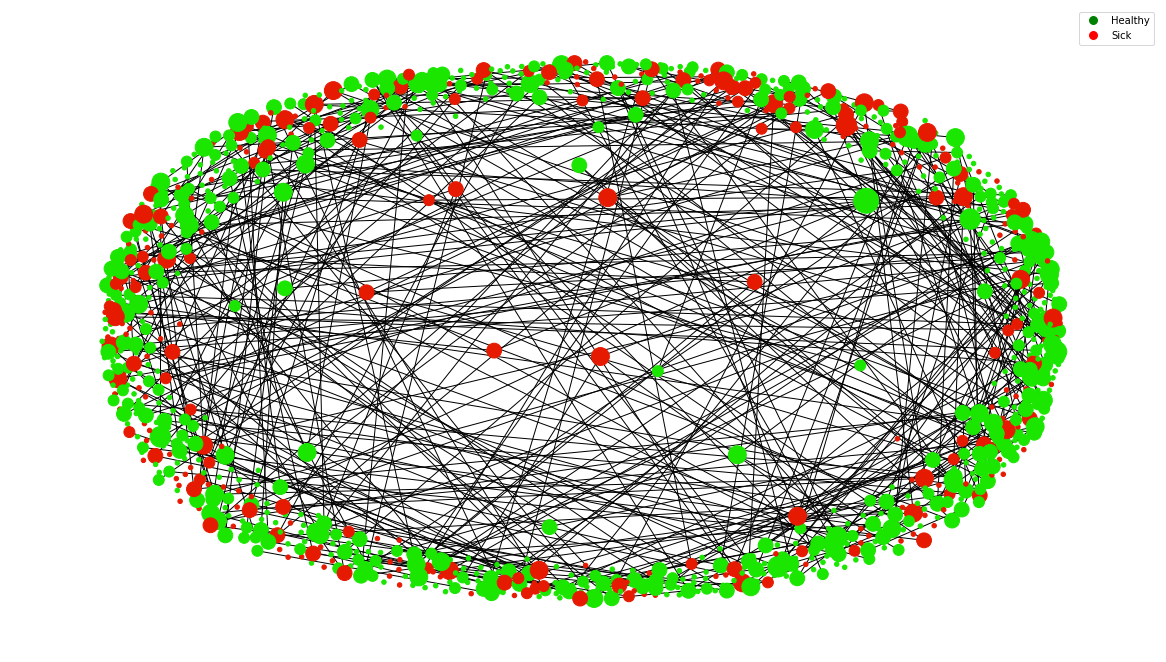

In [19]:

#create custom color map to disinguish between sick, healthy and vaccinated
pos=nx.spring_layout(G,k=1)
colors = [ (0.1, 0.9, 0),(0.9, 0.1, 0)]
cmap = LinearSegmentedColormap.from_list('cmap_own', colors, N=2)
plot_graph(G,pos,cmap)


In [20]:
len((np.array(list(nx.get_node_attributes(G,'activity_status').values()),dtype=np.float64)+1.0)*0.5)

1000

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [59]:
    actstatus=np.array(list(nx.get_node_attributes(G,'activity_status').values()))>0
    node_color = np.array(list(nx.get_node_attributes(G,'state').values()))
    node_size=np.array([20+v*100 for v in dict(G.degree).values()])


In [57]:
np.array(list(nx.get_node_attributes(G,'activity_status').values()))>0

array([False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,

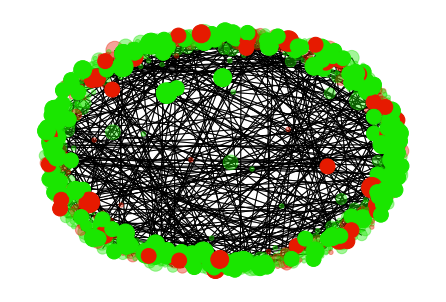

In [64]:
 nx.draw(G,pos=pos , node_color =node_color, nodelist=nodes, vmin=0, vmax=2,node_shape='o', cmap =cmap, node_size=node_size,alpha=0.4)
nx.draw(G,pos=pos , node_color =node_color[actstatus], nodelist=nodes[actstatus], vmin=0, vmax=2,node_shape='o', cmap =cmap, node_size=node_size[actstatus])
   

In [18]:
def plot_graph(G,pos,cmap):
    """
    Plot the graph for SIS model.


    Arguments:
    ----------
    G -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    pos -- layout selected for plotting the network

    cmap -- color map which indicates different states of nodes
    
    Returns:
    --------
    plotted network
    """
    plt.figure(figsize=(16,9))
    #assignes different node size based on node degree
    node_color = list(nx.get_node_attributes(G,'state').values())
    node_size=[20+v*100 for v in dict(G.degree).values()]
    nx.draw(G,pos=pos , node_color =node_color, vmin=0, vmax=2,node_shape='o', cmap =cmap, node_size=node_size,)
    red_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="red",markersize=10)
    green_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="green",markersize=10)
    plt.legend((green_circle,red_circle),('Healthy','Sick'))
    return(plt)

   

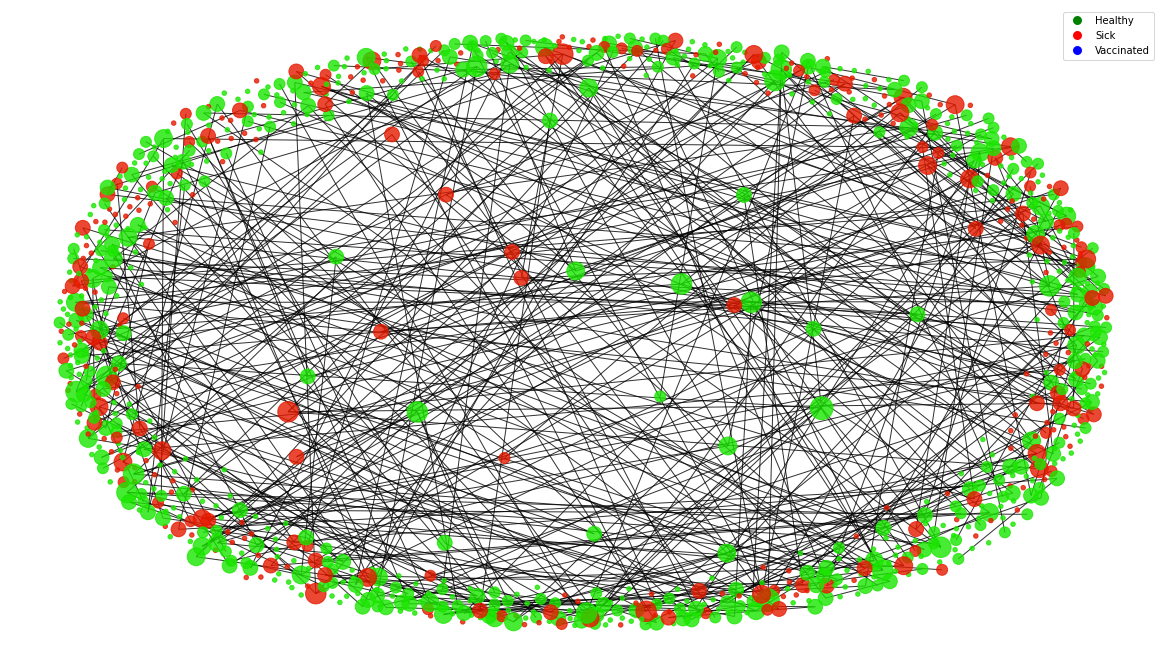

In [14]:
def init_graph():
    plt.plot()

# animation function. This is called sequentially
def animate_graph(ii):
    plt.clf()
    node_color = list(nx.get_node_attributes(graph_list[ii],'state').values())
    node_size=[20+v*100 for v in dict(graph_list[ii].degree).values()]
    nx.draw(graph_list[ii],pos= pos, node_color =node_color, vmin=0, vmax=2, cmap =cmap,node_size=node_size,alpha=0.8)
    red_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="red",markersize=10)
    green_circle = mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="green",markersize=10)
    blue_circle=mlines.Line2D(range(1),range(1),color="white", marker='o', markerfacecolor="blue",markersize=10)
    plt.legend((green_circle,red_circle,blue_circle),('Healthy','Sick','Vaccinated'))


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=((16,9)))
plt.title('Time evolution of SIS model with vaccination')

# call the animator
anim = animation.FuncAnimation(fig, animate_graph, init_func=init_graph, interval=100,frames=len(graph_list))
rc('animation', html='html5')
# anim.save("Graph.gif", dpi=300, writer=PillowWriter(fps=25))
# save animation to file
# writer = animation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('time_evolution_of_graph.mp4', writer=writer)
# anim

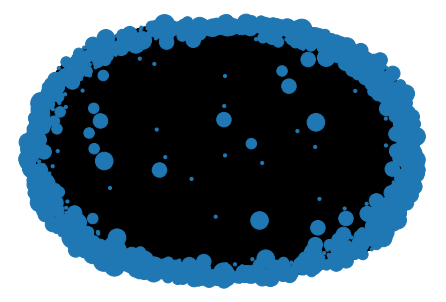

In [121]:
H=nx.Graph()
H.add_nodes_from(nodes)
for graph in graph_list:
     H.add_edges_from(list(H.edges())+list(graph.edges()))
nx.draw(H,pos=pos,node_shape='o',node_size=[10+v*100 for v in dict(G.degree).values()])

Text(0.5, 1.0, 'Wykres dla m=2, $\\gamma$=-1.35')

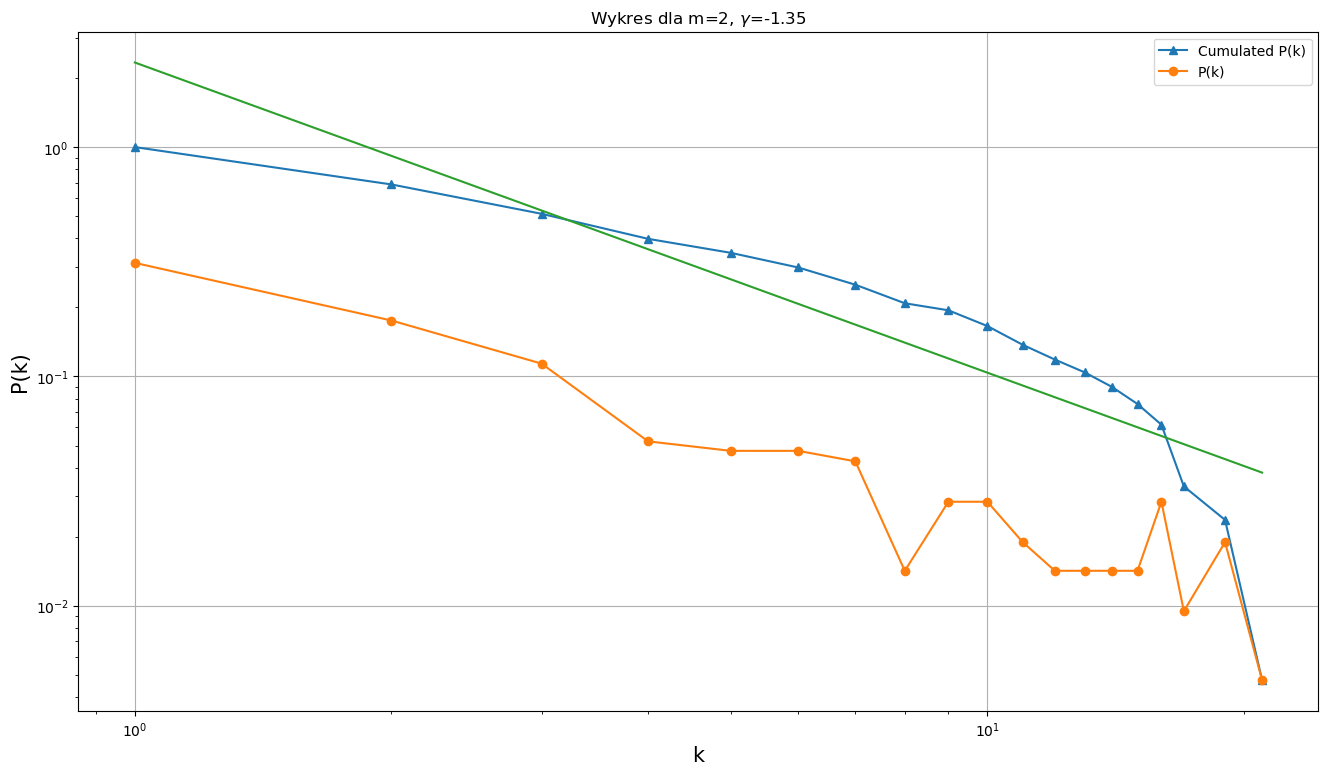

In [123]:
node_list=list(dict(H.degree).values())
vals,counts=np.unique(node_list,return_counts=True)
vals,counts=np.unique(counts,return_counts=True)

prob=counts/np.sum(counts)
cum_sum=np.cumsum(prob[::-1])[::-1]


plt.figure(figsize=(16,9),dpi= 100)
plt.loglog(vals,cum_sum,"^-",label="Cumulated P(k)")

logx = np.log(vals)
logy = np.log(cum_sum)
coeffs = np.polyfit(logx,logy,deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(vals,prob,"o-",label="P(k)")
plt.loglog(vals,yfit(vals))
plt.legend()
plt.grid()
plt.xlabel("k",fontsize=15)
plt.ylabel("P(k)",fontsize=15)
plt.title(f"Wykres dla m={m}, $\gamma$={np.round(coeffs[0],2)}")